<a href="https://colab.research.google.com/github/ShubhamPrakash108/Pytorch_practice_project/blob/main/%F0%9F%93%9A_Students_Performance_Dataset_%F0%9F%93%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
data = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
data = data.iloc[:,1:]
data['GradeClass'].unique()

array([2., 1., 4., 3., 0.])

In [5]:
import torch

In [6]:
data = data.drop(columns=['GPA'])
data

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X = X.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = torch.tensor(X).float()
y = torch.tensor(y.values).long()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


lsvc = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss='squared_hinge', max_iter=1000, multi_class='ovr', penalty='l2', random_state=None, tol=0.0001, verbose=0)
lsvc.fit(X_train, y_train)
# Make predictions
y_pred = lsvc.predict(X_test)

# Evaluate the model
print("Score: ", accuracy_score(y_test, y_pred))

Score:  0.6075156576200418


In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Score: ", accuracy_score(y_test, y_pred))

Score:  0.697286012526096


In [10]:
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [11]:

model = nn.Sequential(
    nn.Linear(12, 200),
    nn.ReLU(),
    nn.Linear(200, 50),
    nn.ReLU(),
    nn.Linear(50, 20),
    nn.ReLU(),
    nn.Linear(20, 5),
    nn.Sigmoid()
)
print(model)

learningRate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

numepochs = 500
losses = torch.zeros(numepochs)
for epochi in range(numepochs):
    yHat = model(X_train)
    loss = criterion(yHat,y_train)
    losses[epochi] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(loss)
with torch.no_grad():  # No gradient computation during evaluation
    predictions = model(X_test)
    predicted_labels = torch.argmax(predictions, dim=1)

# Calculate accuracy
correct = (predicted_labels == y_test).sum().item()
total = y_test.size(0)
accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}')

Sequential(
  (0): Linear(in_features=12, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=5, bias=True)
  (7): Sigmoid()
)
tensor(1.0293, grad_fn=<NllLossBackward0>)
Accuracy: 0.6576


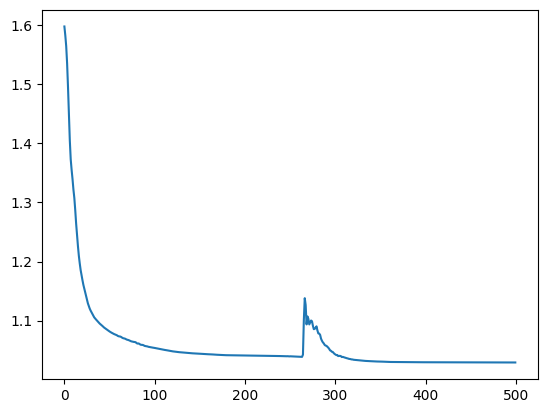

In [12]:
plt.plot(losses)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70
